<a href="https://colab.research.google.com/github/Adsandro/data_science/blob/main/data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando e tratando dados


In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
notes = pd.read_csv("ratings.csv")
notes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [161]:
notes.shape

(100836, 4)

In [162]:
# Renomeando colunas
notes.columns = ["usuarioId", "filmeId", "nota", "momento"]
notes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Retornando média e mediana das notas gerais


Media 3.501556983616962
Mediana 3.5


<Axes: ylabel='Frequency'>

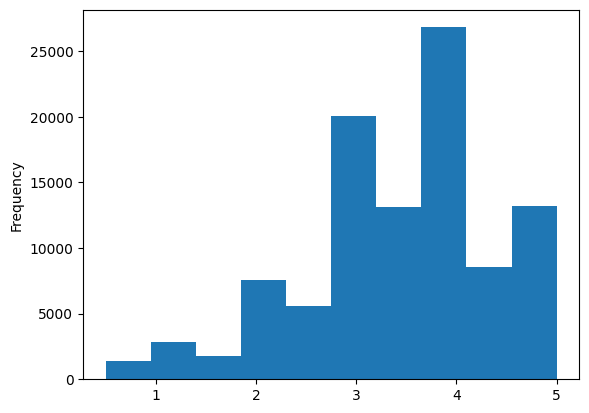

In [163]:
every_notes = notes.nota
print("Media", every_notes.mean())
print("Mediana", every_notes.median())
every_notes.plot(kind="hist")

In [164]:
every_notes.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: >

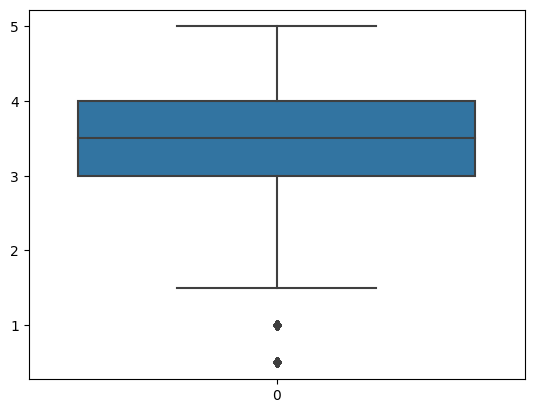

In [165]:
sns.boxplot(every_notes)

# Trabalhando com uma nova tabela e agrupando por id do filme

In [166]:
movies = pd.read_csv("movies.csv")
movies.columns = ["filmeId", "titulo", "genero"]
movies.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [167]:
media_por_filme = notes.groupby("filmeId").mean()
media_por_filme.head().nota

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

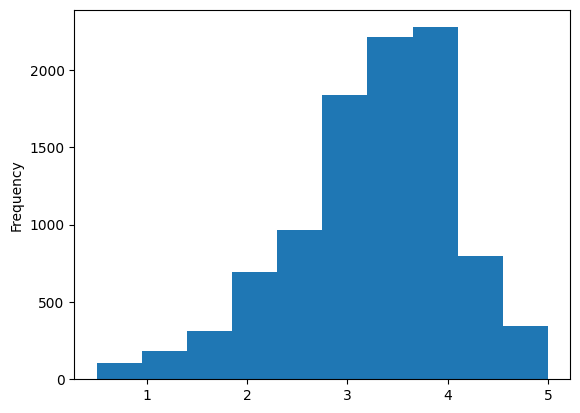

In [168]:
media_por_filme["nota"].plot(kind="hist")

<ipython-input-169-17652e2d9ccb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(media_por_filme['nota'])


<Axes: xlabel='nota', ylabel='Density'>

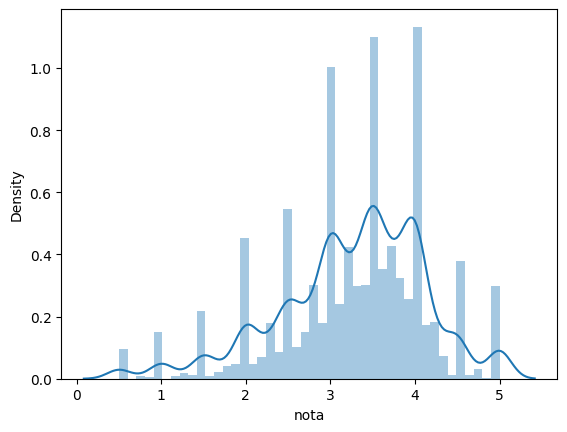

In [169]:
sns.distplot(media_por_filme['nota'])

In [170]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   filmeId  9742 non-null   int64 
 1   titulo   9742 non-null   object
 2   genero   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


# Tipos de dados


In [171]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [172]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# Vizualização de dados

In [173]:
contagem_de_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_linguas.columns = (["lingua original", "total"])
contagem_de_linguas.head()

,lingua original,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


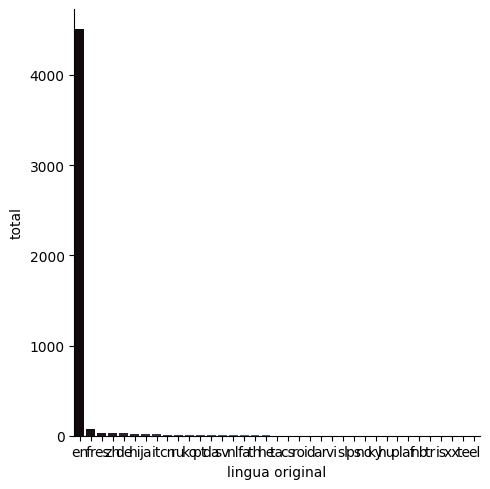

In [174]:
sns.catplot(data=contagem_de_linguas, kind="bar", x= "lingua original", y="total",
            palette="mako")
# sns.catplot(kind="count", data=tmdb, x="original_language")

In [175]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc["en"]
total_resto = total_geral - total_ingles

dados = {
    'Lingua':['Ingles', 'Outros'],
    'Total':[total_ingles, total_resto]
}
dados = pd.DataFrame(dados)


<Axes: xlabel='Lingua', ylabel='Total'>

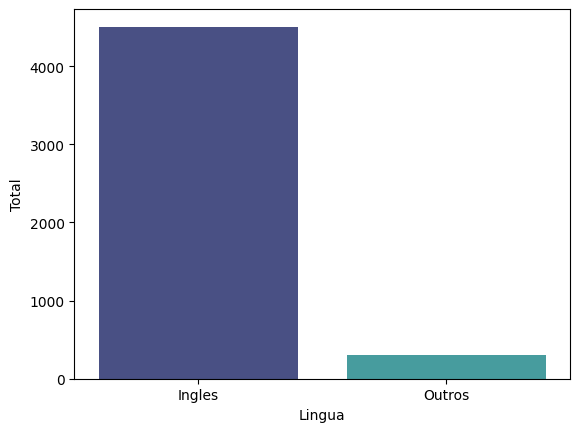

In [176]:
sns.barplot(data=dados, x="Lingua", y="Total",
            palette="mako")

# Refinamento de vizualização

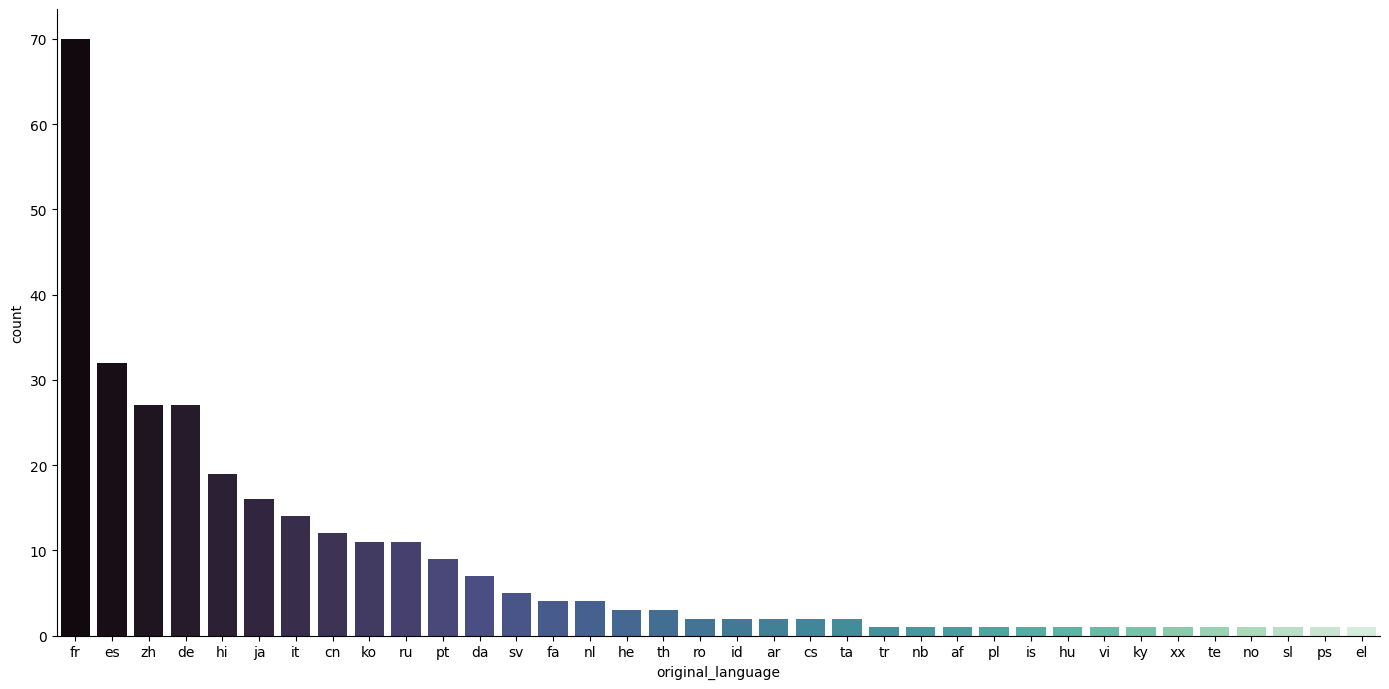

In [177]:
filmes_sem_ingles = tmdb.query("original_language != 'en'")
total_outras_linguas = filmes_sem_ingles.original_language.value_counts()


sns.catplot(x="original_language", data=filmes_sem_ingles, kind="count",
            aspect=2,
            height=7,
            order=total_outras_linguas.index,
            palette="mako")

# Dados e estatistica

In [178]:
movies.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [179]:
notas_toy_story = notes.query("filmeId == 1")
notas_jumanji = notes.query("filmeId == 2")

print(len(notas_jumanji), len(notas_toy_story))

print("Média nota Toy Story: %.2f" % notas_toy_story.nota.mean())
print("Média nota Jumanji: %.2f" % notas_jumanji.nota.mean())

110 215
Média nota Toy Story: 3.92
Média nota Jumanji: 3.43


In [180]:
print("Mediana nota Toy Story: %.2f" % notas_toy_story.nota.median())
print("Mediana nota Jumanji: %.2f" % notas_jumanji.nota.median())

Mediana nota Toy Story: 4.00
Mediana nota Jumanji: 3.50


<Axes: xlabel='filmeId', ylabel='nota'>

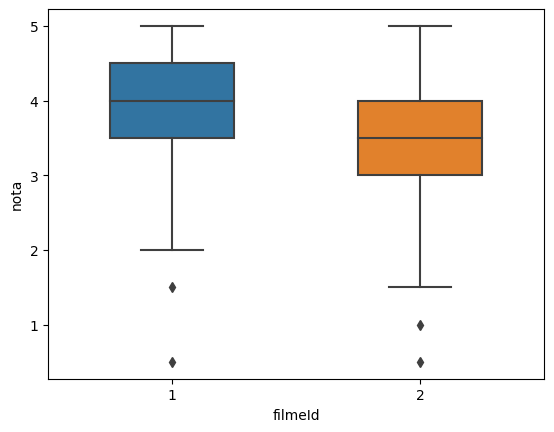

In [181]:
sns.boxplot(data=notes.query('filmeId in [1, 2]'), x='filmeId', y='nota',
            width=0.5)

In [182]:
print("Desvio padrão das notas do Jumanji: %.2f" % notas_jumanji.nota.std())
print("Desvio padrão das notas do Toy Story: %.2f" % notas_toy_story.nota.std())

Desvio padrão das notas do Jumanji: 0.88
Desvio padrão das notas do Toy Story: 0.83
